In [3]:
#importing libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer  
from src.utils import center_based_clustering_algorithms as CBC

- [K-Means](#K_Means)

In [39]:
def train_model(model, n_clusters: int, data: pd.DataFrame): 
    
    if model is KMeans:
        model_instance = model(n_clusters = n_clusters, n_init = "auto")
    else:
        model_instance = model(n_clusters = n_clusters)

    labels = model_instance.fit_predict(data)
    
    centers = model_instance.cluster_centers_

    return labels, centers


In [38]:
def plot_2d_scatter(data: pd.DataFrame, x_axis_column_name: str, y_axis_column_name: str, labels, embedded_centers):
    #plot the data and the centroid for each cluster
    plt.figure(figsize=(10, 10))
    plt.style.use("fivethirtyeight")
    scat = sns.scatterplot(
    x=x_axis_column_name,
    y=y_axis_column_name, 
    s=50,
    data=data, 
    hue=labels,  
    palette="Set2"
    )
    plt.scatter(embedded_centers[:, 0], embedded_centers[:, 1], c='black', s=200, alpha=0.5)
    scat.set_title( "Clustering results from .... data") 
    plt.show()

In [4]:
# Reading data as dataframe
data = pd.read_csv('../data/featsel/data_scaled_minmax.csv')
data

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,age,...,work_cms_zone_Northern Bronx,work_cms_zone_Outer Brooklyn,work_cms_zone_Outer Queens,work_cms_zone_Southern Bronx,work_cms_zone_Staten Island,work_cms_zone_Upper Manhattan,first_travel_date_day,first_travel_date_month,last_travel_date_day,last_travel_date_month
0,0.129213,0.010753,0.052632,0.305556,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,1.0,0.966667,1.0
1,0.084270,0.021505,0.017544,0.000000,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.0,0.100000,1.0
2,0.168539,0.236559,0.157895,0.000000,0.0,0.000000,1.0,1.0,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,1.0,0.366667,1.0
3,0.269663,0.247312,0.228070,0.000000,0.0,0.000000,1.0,0.4,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.700000,1.0
4,0.252809,0.139785,0.105263,0.333333,0.0,0.111111,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.233333,1.0,0.433333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,0.011236,0.000000,0.035088,0.000000,0.0,0.000000,0.0,0.2,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,1.0,0.400000,1.0
3342,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,0.0,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.0,0.966667,0.0
3343,0.016854,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,0.0,0.766667,0.0
3344,0.022472,0.000000,0.035088,0.000000,0.0,0.055556,0.5,0.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.466667,1.0,0.466667,1.0


## Dimentioality Reduction
- Using PCA to reduce the original number of feature to 2, generates only 2 components, So we can plot the data. 

In [6]:
#Initiate a pca model to reduce the dimentions of the data
#so we can plot it in the 2d space (as a post-processing step)
pca_model = PCA(n_components=2, random_state=0) 
#reduce the dimentions of the data used in the training process 
pca_data = pca_model.fit_transform(data)
#reduce the dimentions of the centroids  
# define "components_df" that include the valuse for the components after reducing the dimentions 
two_components_df = pd.DataFrame(
    pca_data,
    columns=["component_1", "component_2"],
    )

# K-Means  <a class="anchor" id="K_Means"></a>

##### Using the elbow method to find the best value for K, trying K-means++ using the original dataset

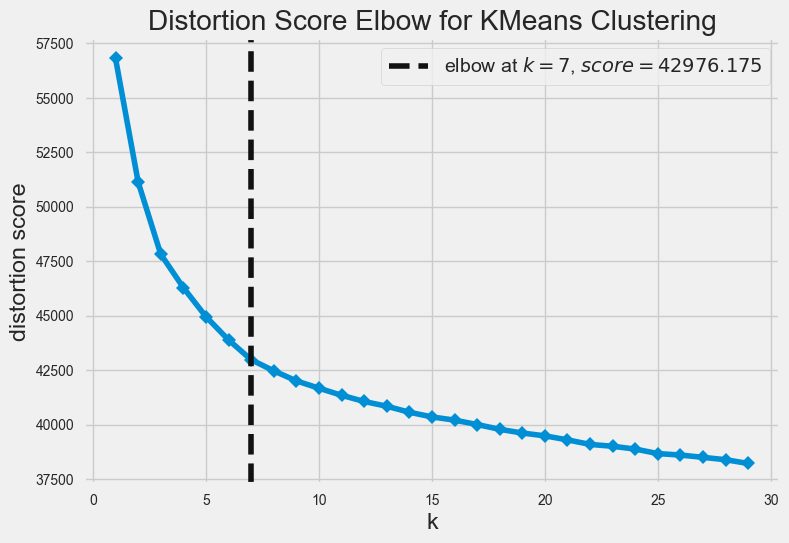

In [60]:
# define a kmeans object 
K_means_model = KMeans(n_init = 150)

# define "potential_k_list" that contains k values we will go over while calculating the erro
potential_k_list = list(range(1, 30))

#plot the sse for each k 
CBC.plot_elbow(data, K_means_model, potential_k_list)

> ##### `From the plot above we can see the distortion score(SSE) for k values between 1 - 30. After k = 7 the distorion score start decreasing in a linear fashion which indicates that the best number of clusters could be 7.`

### Plot the silhouette plot for K-means++ trying different values for k using the original dataset

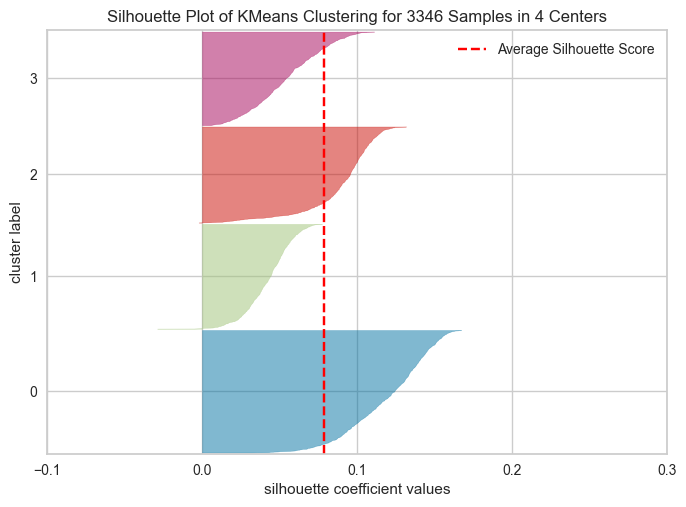

In [8]:
CBC.plot_silhouette(4, KMeans, data) 

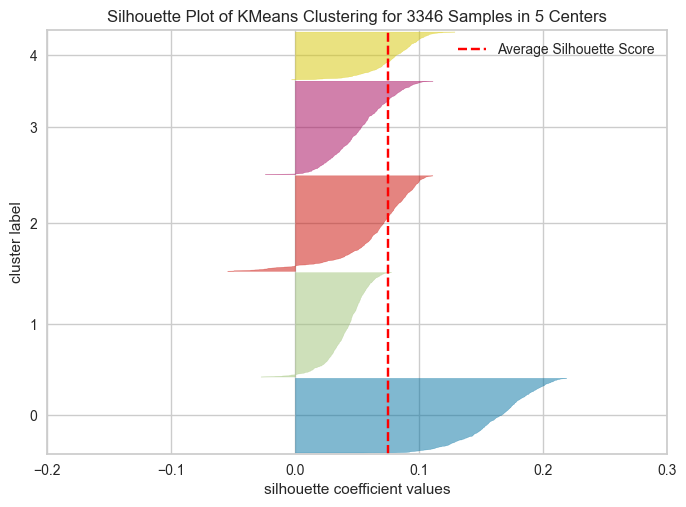

In [9]:
CBC.plot_silhouette(5, KMeans, data)

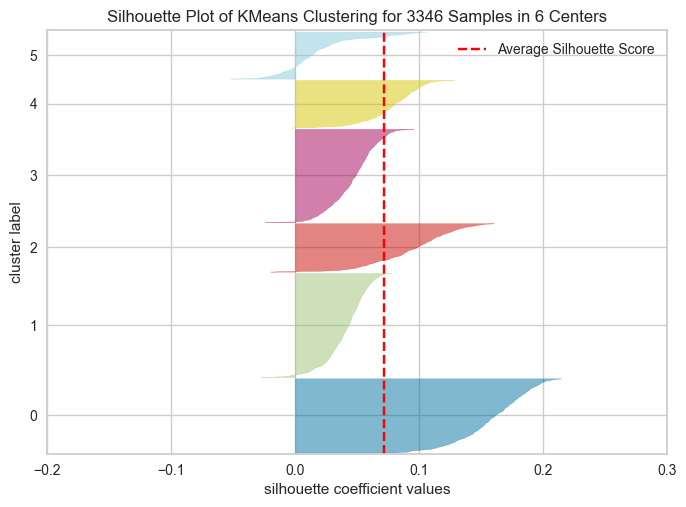

In [10]:
CBC.plot_silhouette(6, KMeans, data)

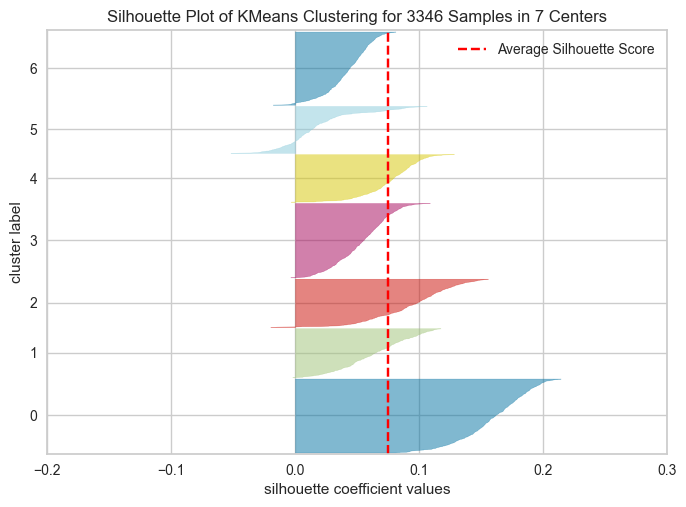

In [11]:
CBC.plot_silhouette(7, KMeans, data)

In [57]:
## define "potential_k_range" a list contains k valuse we want go over to calculate 
#the average silhouette score
potential_k_range = list(range(2, 30))

#define "silhouette_score_for_ks" a list contains the silhouette score 
#for k values between 2 - 29
silhouette_score_for_ks = CBC.calculate_silhouette_score(KMeans, potential_k_range, data)

#go over the silhouette average for k values between 4 - 7
for index, score in enumerate(silhouette_score_for_ks[2:6]) :
    print(f"The average silhouette_score is: {score} for K = {index + 4}.")

The average silhouette_score is: 0.07873369480494771 for K = 4.
The average silhouette_score is: 0.0753088086906613 for K = 5.
The average silhouette_score is: 0.07135081039989177 for K = 6.
The average silhouette_score is: 0.07507053884363876 for K = 7.


* K = 4 has the lowest number of points that are overlapped to different clusters, it's average silhouete score is the highest one comparing with k values of 5, 6, 7.
* When K = 7, all clusters are above the silhouette score, but its average silhouete score is less than the score of K = 4.


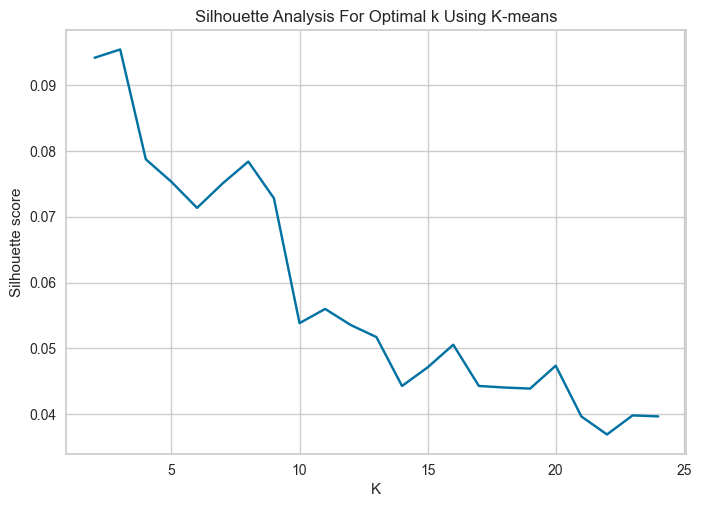

In [12]:
CBC.plot_silhouette_score(potential_k_range, silhouette_score_for_ks, "K-means")

In [13]:
#Define data_labels, a dataframe that will contain labels for each sample after
#applying different clustering algorithsm
data_labels = pd.DataFrame()

#### Visualizing cluster in 2D 

> - `I will choose 7 as a value for k, according to the elbow method.` 

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


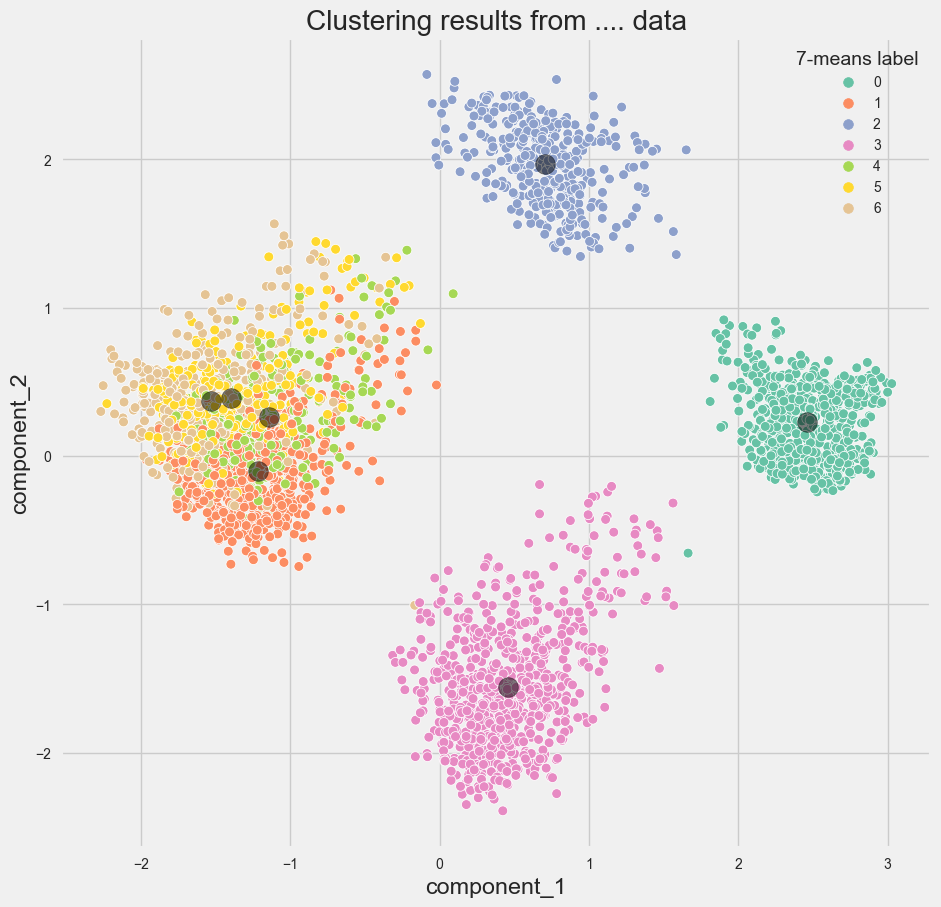

In [42]:
# #get centroids for the cluster and labels for each datapoint
data_labels['7-means label'], seven_means_centers = train_model(KMeans, 7, data)

#reduce centers dimentions so we can plot them
embedded_centers_7_means = pca_model.transform(seven_means_centers)

#Plot
plot_2d_scatter(two_components_df, "component_1", "component_2", data_labels['7-means label'], embedded_centers_7_means)

> * `Trying clutering the data into four clusters`

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


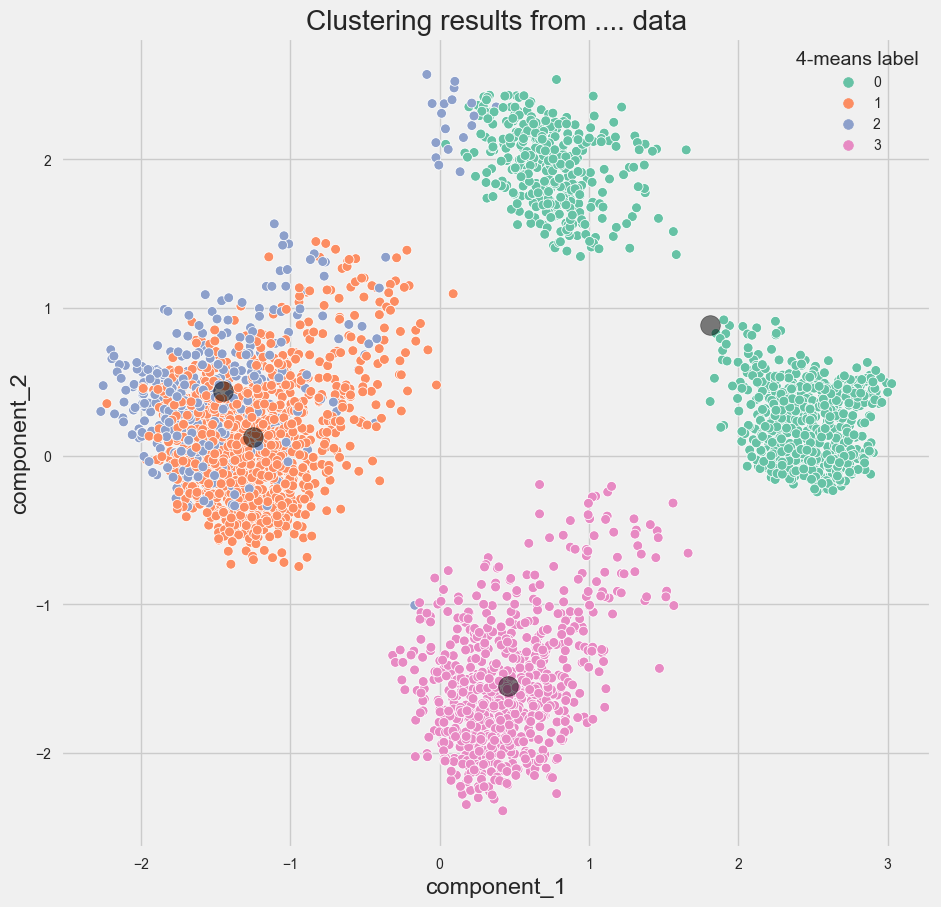

In [58]:
# #get centroids for the cluster and labels for each datapoint
data_labels['4-means label'], four_means_centers = train_model(KMeans, 4, data)

#reduce centers dimentions so we can plot them
embedded_centers_4_means = pca_model.transform(four_means_centers)

#Plot
plot_2d_scatter(two_components_df, "component_1", "component_2", data_labels['4-means label'], embedded_centers_4_means)

> Accordint to the 2D visualization, we can conclude that 7-means++ didn't perfom well because of the overlapping in the clusters.

# K-Means using data after the dimensioality reduction

#### Using the elbow method to find the best value for K, trying K-means++ using data after the dimensioality reduction
Note: Distortion is the sum of squared error

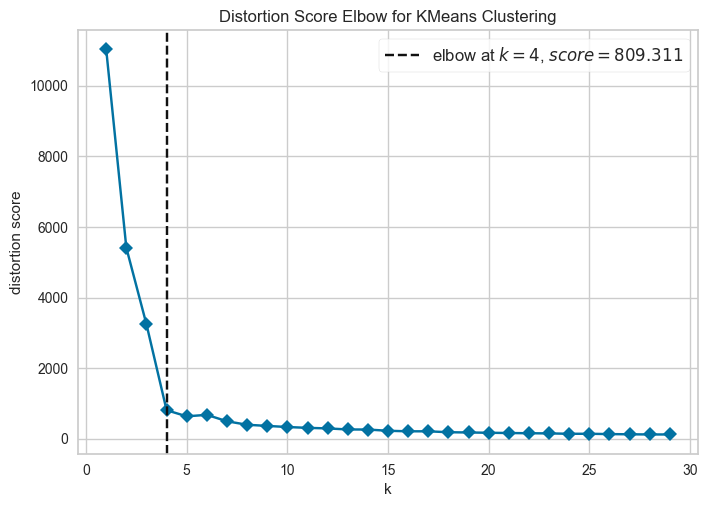

In [5]:
# define a kmeans object 
K_means_model_ = KMeans(n_init = "auto") 

#plot the sse for each k
CBC.plot_elbow(two_components_df, K_means_model_, potential_k_list) 

##### `From the plot above, a value of 4 could be the best value for k`

### Plot the silhouette plot for K-means++ trying different values for k using the data after reduce its dimentions

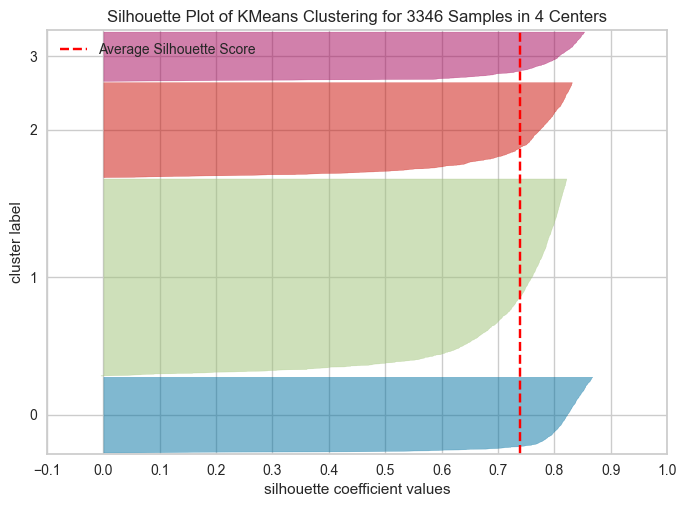

In [10]:
CBC.plot_silhouette(4, KMeans, two_components_df)

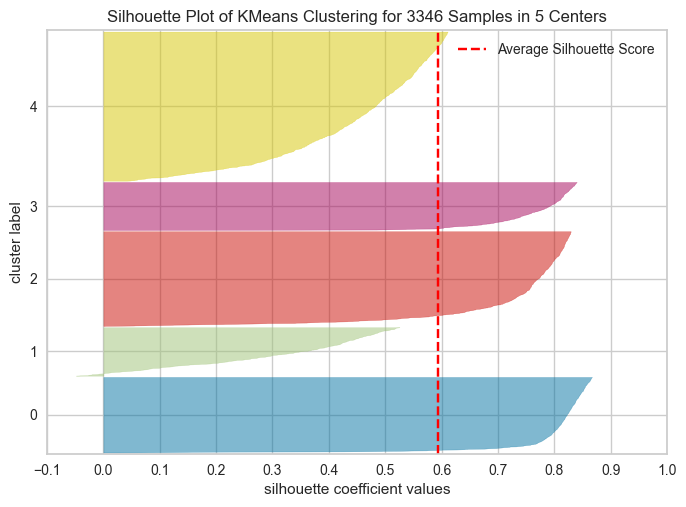

In [11]:
CBC.plot_silhouette(5, KMeans, two_components_df)

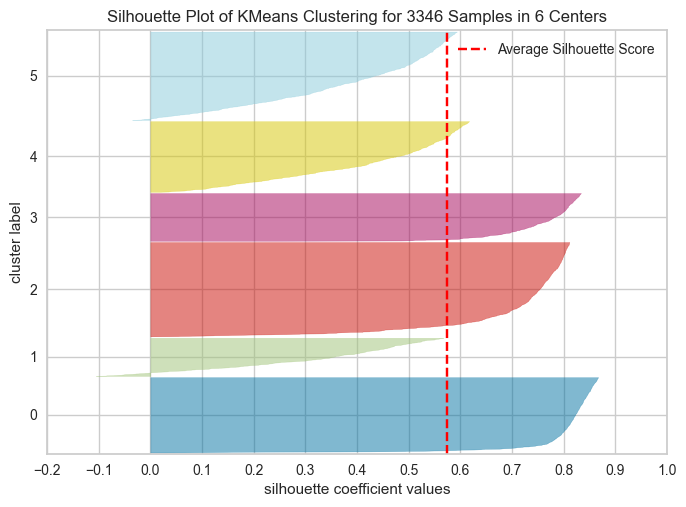

In [12]:
CBC.plot_silhouette(6, KMeans, two_components_df)

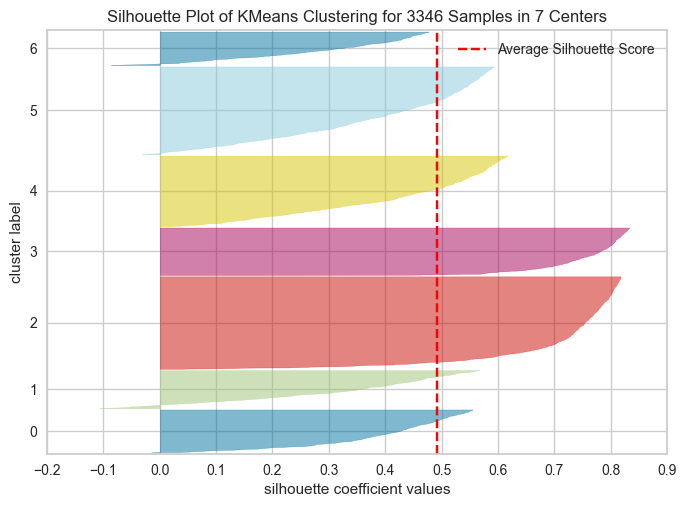

In [13]:
CBC.plot_silhouette(7, KMeans, two_components_df)

In [62]:
## define "potential_k_range" a list contains k valuse we want go over to calculate 
#the average silhouette score
k_range = list(range(4, 8))

#define "silhouette_score_for_ks" a list contains the silhouette score 
#for k values between 4 - 7
silhouette_score_for_ks_ = CBC.calculate_silhouette_score(KMeans, k_range, two_components_df)

#go over the silhouette average for k values between 4 - 7
for index, score in enumerate(silhouette_score_for_ks_) :
    print(f"The average silhouette_score is: {score} for K = {index + 4}.")

The average silhouette_score is: 0.7394477728257464 for K = 4.
The average silhouette_score is: 0.5937662545230743 for K = 5.
The average silhouette_score is: 0.574730210266554 for K = 6.
The average silhouette_score is: 0.49106372970147044 for K = 7.


Conclusion here..........

>All clusters in the first plot are above the average silhouette scores.

#### Visualizing cluster in 2D 

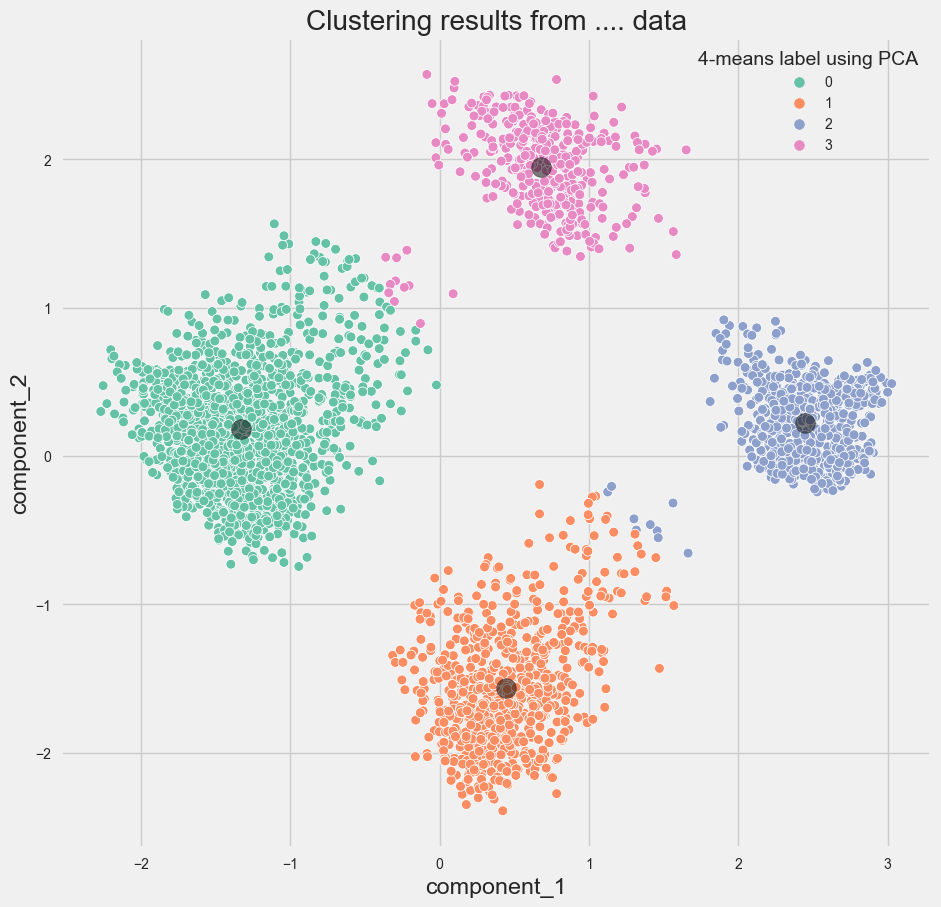

In [43]:
# #get centroids for each cluster and labels for each datapoint
data_labels['4-means label using PCA'], four_means_centers = train_model(KMeans, 4, two_components_df)
 
#Plot
plot_2d_scatter(two_components_df, "component_1", "component_2", data_labels['4-means label using PCA'], four_means_centers)

# K-Medoids  


##### Using the elbow method to find the best value for K, trying K-medoids using the original dataset

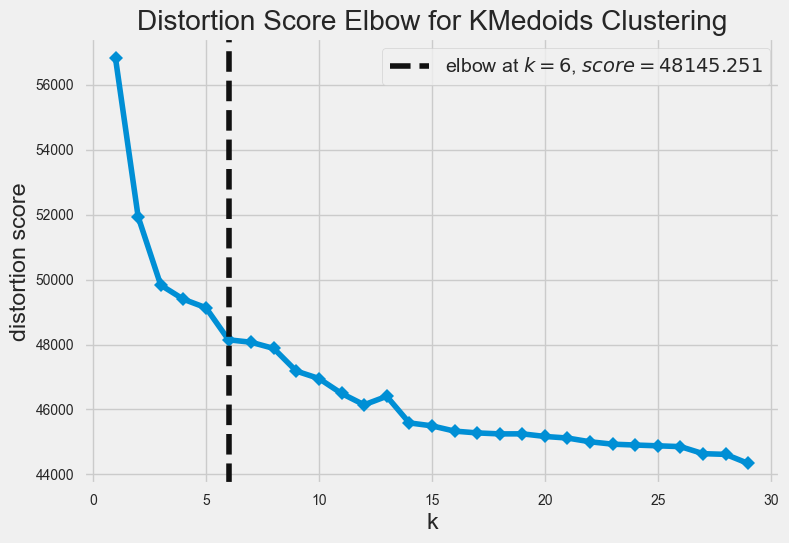

In [63]:
# Instantiate KMedoids the clustering model 
K_medoids_model_ = KMedoids() 

#plot the sse for each k  
CBC.plot_elbow(data, K_medoids_model_, potential_k_list)

> `Value of 6 could be a best value for k`

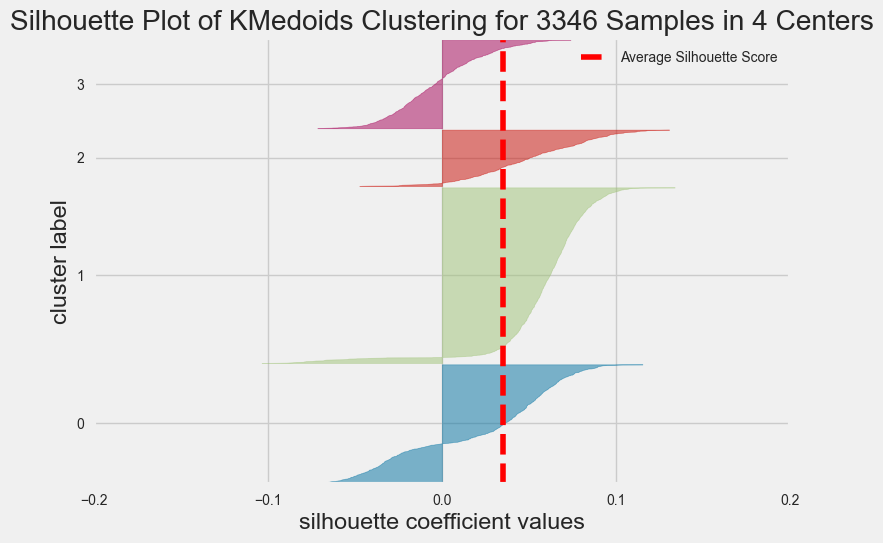

In [24]:
CBC.plot_silhouette(4, KMedoids, data) 

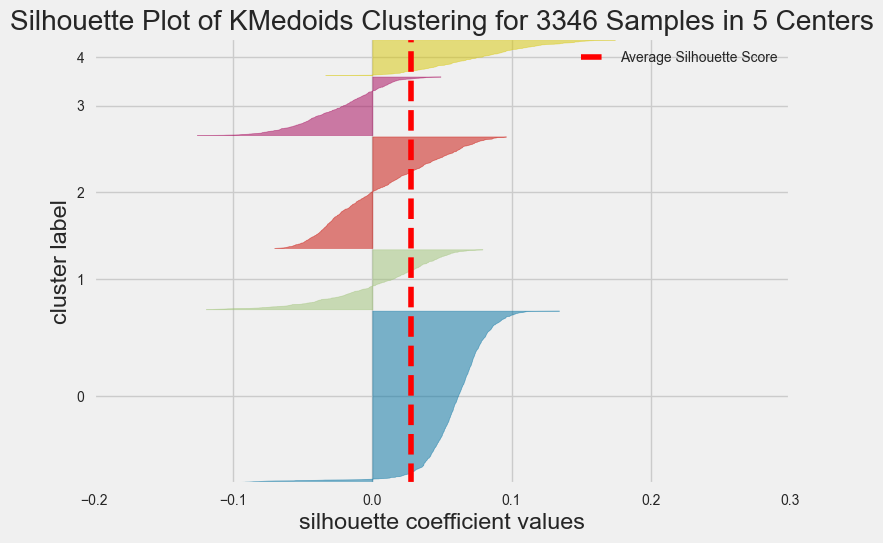

In [25]:
CBC.plot_silhouette(5, KMedoids, data) 

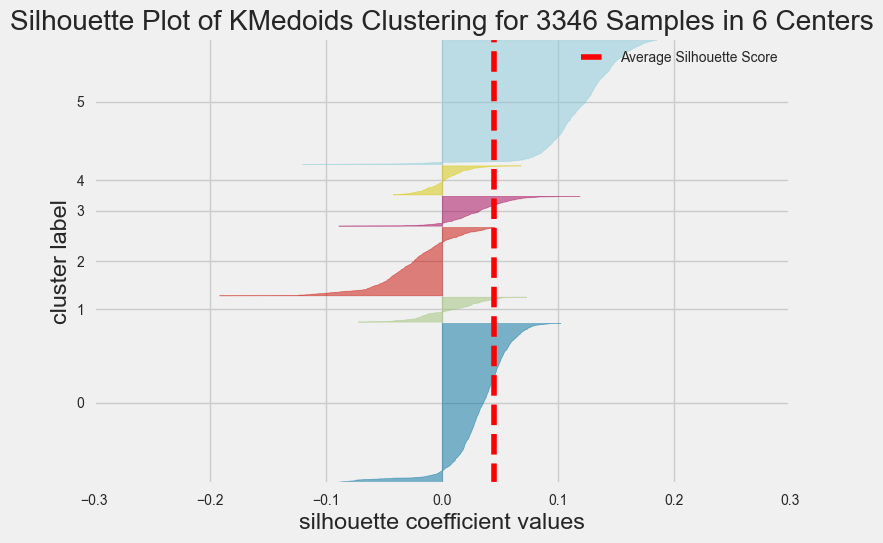

In [26]:
CBC.plot_silhouette(6, KMedoids, data)

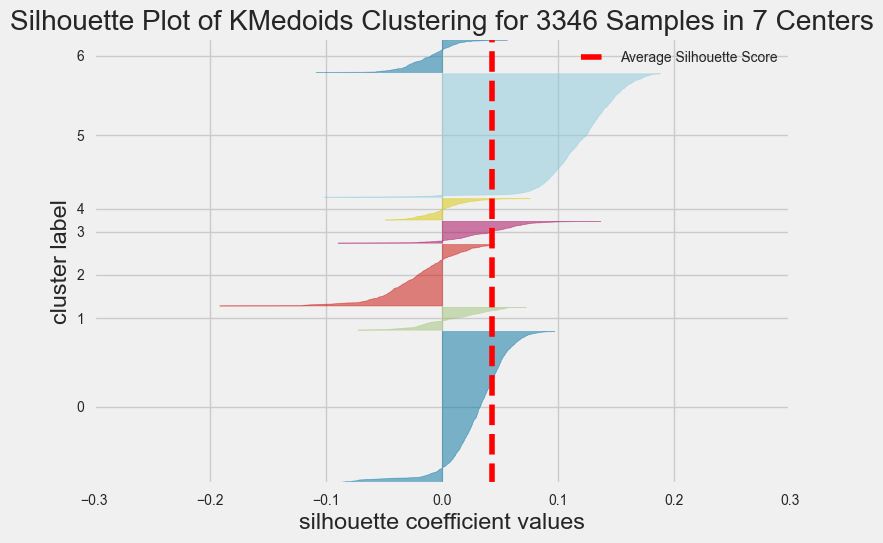

In [27]:
CBC.plot_silhouette(7, KMedoids, data) 

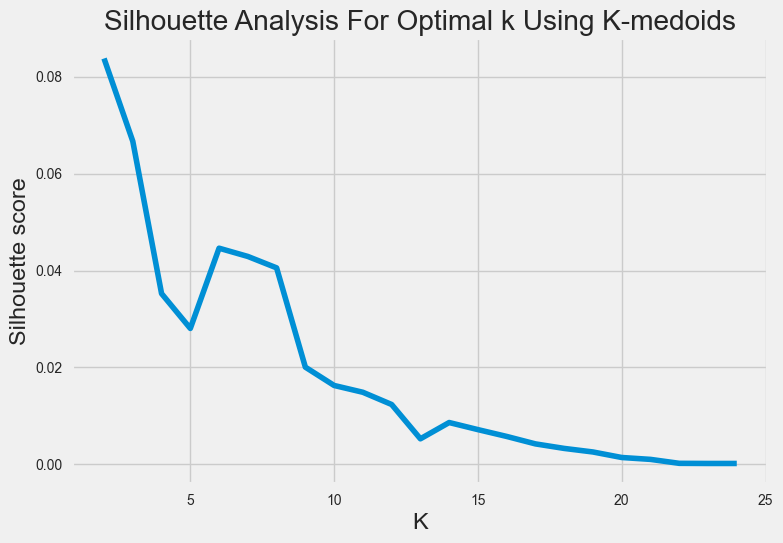

In [23]:
#define "silhouette_score_for_medoids_ks" a list contains the silhouette score 
#for k values between 2 - 29    
silhouette_score_for_medoids_ks = CBC.calculate_silhouette_score(KMedoids, potential_k_range, data)

CBC.plot_silhouette_score(potential_k_range, silhouette_score_for_medoids_ks, "K-medoids")

In [65]:
#go over the silhouette average for k values between 4 - 7 and print it
for index, score in enumerate(silhouette_score_for_medoids_ks[2:6]) :
    print(f"The average silhouette_score is: {score} for K = {index + 4}.")

The average silhouette_score is: 0.03523593034427679 for K = 4.
The average silhouette_score is: 0.02804114464023852 for K = 5.
The average silhouette_score is: 0.04460448856441024 for K = 6.
The average silhouette_score is: 0.0429023684459916 for K = 7.


- Comparing results from the two evaluation metrics(elbow and silhouette) after applying K-Means++ and K-Medoids, we can figure out that K-Means++ performed better than K-Medoids where the K-Means++ sse is lower than K-Medoids sse, values of K-Medoids silhouette score is lower than K-Means++ values.


c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


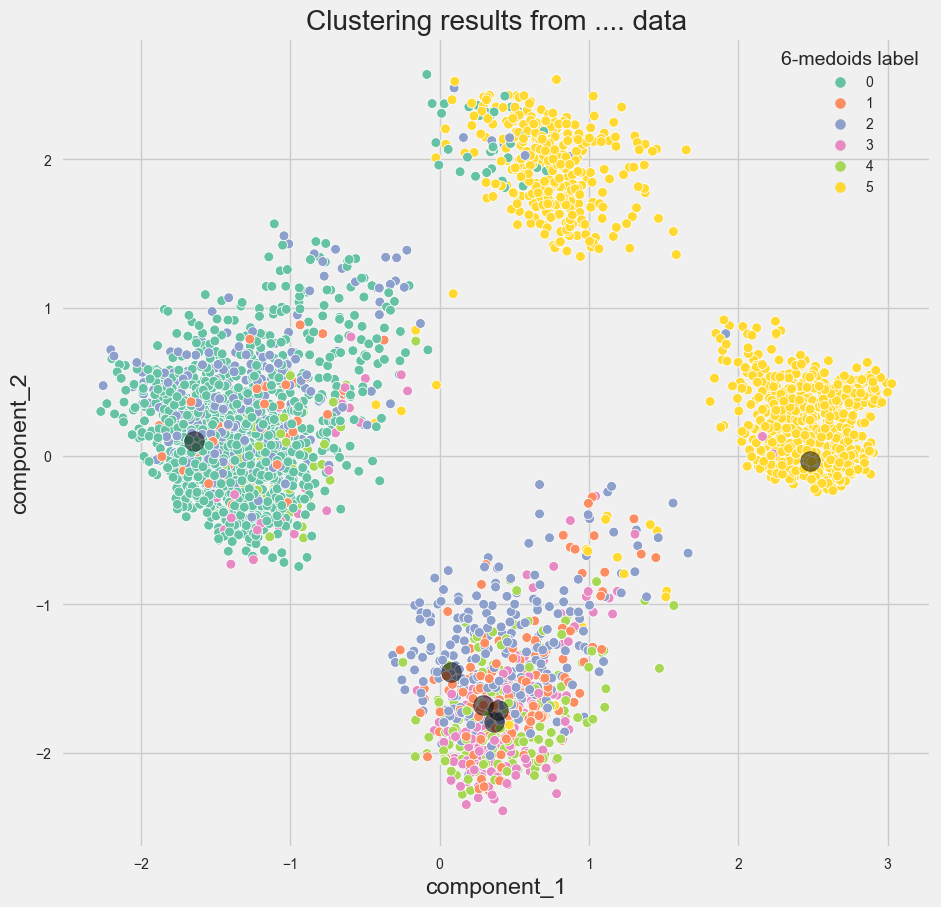

In [66]:
#get centroids for each cluster and labels for each datapoint
data_labels['6-medoids label'], six_medoids_centers = train_model(KMedoids, 6, data)

#reduce centers dimentions so we can plot them
embedded_centers_6_medoids = pca_model.transform(six_medoids_centers)

#Plot
plot_2d_scatter(two_components_df, "component_1", "component_2", data_labels['6-medoids label'], embedded_centers_6_medoids)

#### Using the elbow method to find the best value for K, trying K-medoids using data after the dimensioality reduction

In [ ]:
pd.concat([data_labels["4-means label using PCA"], data], axis = 1).to_csv('./centered_based_algorithms_labels.csv', index = False)